In [9]:
import os

os.environ["GEOMSTATS_BACKEND"] = "pytorch"


import geomstats.backend as gs
import matplotlib.pyplot as plt
import torch

import neural_metric

results_prefix = "TOPUT"

In [11]:
model_filename = f"results/trained_models/{results_prefix}_model.pt"
model = torch.load(model_filename)
model.eval()

VAE(
  (fc1): Linear(in_features=40, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=400, bias=True)
  (fc_z_mu): Linear(in_features=400, out_features=2, bias=True)
  (fc_z_logvar): Linear(in_features=400, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=400, bias=True)
  (fc_x_mu): Linear(in_features=400, out_features=40, bias=True)
  (fc_x_logvar1): Linear(in_features=400, out_features=400, bias=True)
  (fc_x_logvar2): Linear(in_features=400, out_features=40, bias=True)
)

In [12]:
neural_immersion = neural_metric.get_neural_immersion(model)

metric = neural_metric.NeuralMetric(dim=1, embedding_dim=2, immersion=neural_immersion)

mean_curvature = []
thetas = gs.linspace(0, 2 * gs.pi, 200)

for theta in thetas:
    mean_curvature.append(metric.mean_curvature(theta))

tensor(0.0706)

# Evaluation

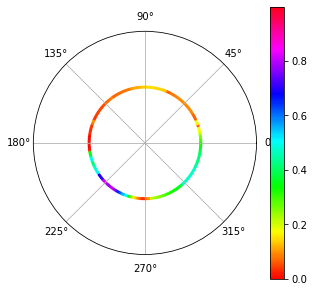

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

xval = np.linspace(0, 2 * np.pi, 200)
yval = np.ones_like(xval)


colormap = plt.get_cmap("hsv")

## Reference color plot

norm = mpl.colors.Normalize(0.0, 2 * np.pi)

mean_curvature_norm = [gs.linalg.norm(vec) for vec in mean_curvature]

# ax1 = plt.subplot(1, 2, 1, polar=True)
# ax1.scatter(xval, yval, c=xval, s=15, cmap=colormap, norm=norm, linewidths=0)


## Plot mean curvature norm

color_norm = mpl.colors.Normalize(0.0, 1.2 * max(mean_curvature_norm))
plt.figure(figsize=(5, 5))

ax2 = plt.subplot(polar=True)
sc = ax2.scatter(
    xval,
    yval,
    c=mean_curvature_norm,
    s=10,
    cmap=colormap,
    norm=color_norm,
    linewidths=0,
)
# ax1.set_yticks([])
ax2.set_yticks([])

plt.colorbar(sc)

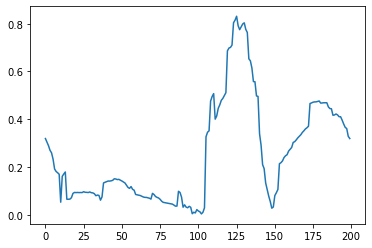

In [15]:
mean_curvature_norm = [gs.linalg.norm(vec) for vec in mean_curvature]
plt.plot(mean_curvature_norm)

# Create curved manifold (synthetic data)

In [60]:
import os

os.environ["GEOMSTATS_BACKEND"] = "pytorch"


import geomstats.backend as gs
import matplotlib.pyplot as plt
import torch

import neural_metric
from geomstats.geometry.special_orthogonal import SpecialOrthogonal
import numpy as np
import torch.nn.functional as F

In [65]:
def get_synth_immersion(circle_radius, n_wiggles, amp_wiggles, embedding_dim):
    """Creates function whose image is "wiggly" circles in high-dim space.

    Parameters
    ----------
    circle_radius : float
        Primary circle radius.
    n_wiggles : int
        Number of "wiggles".
    amp_wiggles : float, < 1
        Amplitude of "wiggles".
    embedding_dim : int
        Dimension of immersion codomain.

    Returns
    -------
    synth_immersion : function
        Synthetic immersion from S1 to R^N.
    """
    
    def polar(angle):
        """Extrinsic coordinates of embedded 1-sphere parameterized by angle.

        Parameters
        ----------
        angle : float

        """
        return gs.array([gs.cos(angle), gs.sin(angle)])

    def synth_immersion(angle):
        """Synthetic immersion function.
        
        Parameters
        ----------
        angle : float 
            Angle coordinate on circle.

        Returns
        -------
        padded_point : array-like, shape=[embedding_dim, ]
            Yiels an embedding_dim-dimensional point making up wiggly circle
        """
        amplitude = circle_radius * (1 + amp_wiggles * gs.cos(n_wiggles * angle))

        point = amplitude*polar(angle)

        padded_point = F.pad(input=point, pad=(0,embedding_dim-2),mode="constant",value=0.0)

        so = SpecialOrthogonal(n=embedding_dim)
        
        rot = so.random_point() 

        
        return gs.einsum("ij,j->i", rot, padded_point)

    return synth_immersion

In [66]:
synthetic_immersion = get_synth_immersion(circle_radius = 1, n_wiggles = 5, amp_wiggles = 0.2, embedding_dim = 5)

In [67]:
synth_metric = neural_metric.NeuralMetric(dim=1, embedding_dim=5, immersion=synthetic_immersion)

thetas = gs.linspace(0,2*gs.pi,10)

m = [synth_metric.mean_curvature(theta) for theta in thetas]


In [70]:
m[0]

tensor([5.6528, 0.2180, 0.3611, 2.4457, 0.3147])

In [59]:
results_prefix = "experimental_2022-08-24 11:09:00"

model_filename = f"results/trained_models/{results_prefix}_model.pt"
model = torch.load(model_filename)
model.eval()
immersion = neural_metric.get_neural_immersion(model)

test_metric = neural_metric.NeuralMetric(dim=1, embedding_dim=40, immersion=immersion)


In [57]:
angles = gs.linspace(0,2*gs.pi,10)

m = [test_metric.mean_curvature(angle) for angle in angles]

In [102]:
from main_eval import mean_curv_vector as curv
import importlib 
importlib.reload(main_eval)
import main_eval 
import pandas as pd

# Evaluate Synthetic Data

### From analytic form of immersion

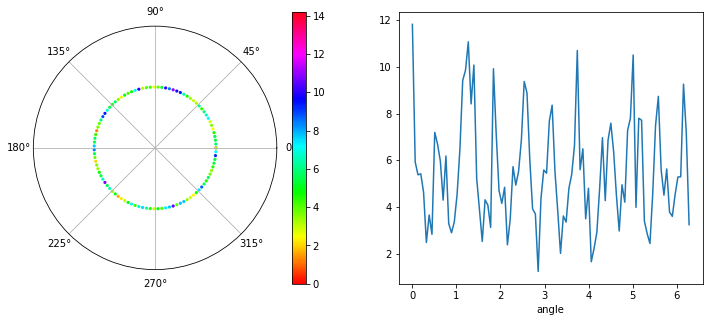

In [104]:
params = {
    "immersion_type": "analytic",
    "radius": 1,
    "n_wiggles": 5,
    "amp_wiggles": 0.3,
    "embedding_dim": 5,
    "model_filename": None,
}

angles = gs.linspace(0,2*gs.pi,100)

mean_curv_vectors = main_eval.mean_curv_vector(angles,params)

mean_curv_norm = [gs.linalg.norm(vec) for vec in mean_curv_vectors]

main_eval.plot(angles,mean_curv_norm)

### From learned immersion via VAE

filename = 

params = {
    "immersion_type": "VAE",
    "radius": None,
    "n_wiggles": None,
    "amp_wiggles": None,
    "embedding_dim": None,
    "model_filename": filename,
}

angles = gs.linspace(0,2*gs.pi,100)

mean_curv_vectors = main_eval.mean_curv_vector(angles,params)

mean_curv_norm = [gs.linalg.norm(vec) for vec in mean_curv_vectors]

main_eval.plot(angles,mean_curv_norm)

In [108]:
def load_wiggles(
    n_times=1000,
    synth_radius=1,
    n_wiggles=6,
    amp_wiggles=0.4,
    embedding_dim=10,
    noise_var=0.01,
):
    """Create "wiggly" circles with noise.

    Parameters
    ----------
    n_times : int

    circle_radius : float
        Primary circle radius.
    n_wiggles : int
        Number of "wiggles".
    amp_wiggles : float, < 1
        Amplitude of "wiggles".
    embedding_dim : int
        Dimension of embedding dimension.
    noise_var : float
        Variance (sigma2) of the Gaussian noise.

    Returns
    -------
    noisy_data : array-like, shape=[embedding_dim, n_times]
        Number of firings per time step and per cell.
    labels : pd.DataFrame, shape=[n_times, 1]
        Labels organized in 1 column: angles.
    """

    def polar(angle):
        return gs.stack([gs.cos(angle), gs.sin(angle)], axis=0)

    def synth_immersion(angles):
        amplitudes = synth_radius * (1 + amp_wiggles * gs.cos(n_wiggles * angles))
        #wiggly_circle = gs.einsum("ik,jk->ij", polar(angles), np.diag(amplitudes))
        wiggly_circle = gs.matmul(polar(angles),np.diag(amplitudes))

        # padded_wiggly_circle = gs.vstack(
        #     [wiggly_circle, gs.zeros((embedding_dim - 2, len(angle)))]
        # )
        padded_wiggly_circle = F.pad(input = wiggly_circle, pad = (0,0,0,embedding_dim-2),mode="constant", value=0.0 )

        so = SpecialOrthogonal(n=embedding_dim)

        rot = so.random_point()

        return gs.einsum("ik,kj->ij", rot, padded_wiggly_circle)

    angles = gs.linspace(0, 2 * gs.pi, n_times)

    labels = pd.DataFrame(
        {
            "angles": angles,
        }
    )

    noise_cov = np.diag(noise_var * gs.ones(embedding_dim))

    noisy_data = (
        synth_immersion(angles)
        + gs.random.multivariate_normal(
            mean=gs.zeros(embedding_dim), cov=noise_cov, size=len(angles)
        ).T
    )

    return noisy_data, labels

In [120]:
a = load_wiggles()

KeyError: dtype('float32')